# Testing production and degradation on ABC

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

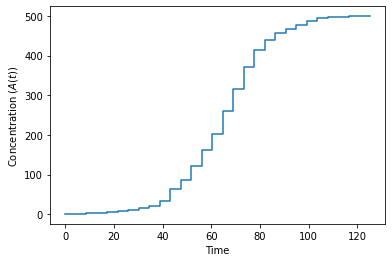

In [3]:
n_0 = 1
model = pints.toy.stochastic.LogisticModel(n_0)

times = np.linspace(0, 125, 30)

# $b_0$ = 0.1, $k$ = 500
params = [0.1, 500]

values = model.simulate(params, times)
problem = pints.SingleOutputProblem(model, times, values)
error_measure = pints.RootMeanSquaredError(problem)

log_prior = pints.UniformLogPrior([0.0, 400], [0.3, 700])

plt.step(times, values)
plt.xlabel('Time')
plt.ylabel(r'Concentration ($A(t)$)')
plt.show()

# Rejection ABC

In [4]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(30)

# set target number of samples
abc.set_n_samples(1000)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     5      0.2              0:00.0
2     57     0.0350877193     0:00.3
3     78     0.0384615385     0:00.4
20    1631   0.0122624157     0:09.3
40    2799   0.0142908181     0:15.4
60    3514   0.0170745589     0:19.6
80    5518   0.0144980065     0:31.8
100   6669   0.0149947518     0:38.5
120   8238   0.0145666424     0:47.8
140   9650   0.014507772      0:56.0
160   11385  0.0140535793     1:06.6
180   12650  0.014229249      1:14.0
200   14873  0.0134471862     1:26.5
220   16027  0.013726836      1:33.4
240   17338  0.013842427      1:41.2
260   19406  0.0133979182     1:53.1
280   20598  0.0135935528     1:59.8
300   22327  0.0134366462     2:10.1
320   24179  0.0132346251     2:21.0
340   26389  0.0128841563     2:33.1
360   27315  0.0131795717     2:37.7
380   29135  0.0130427321     2:47.0
400   31247  0.0128012289     2:57.7
420   32554  0.0129016404     3:03.8
440   34185  0.0

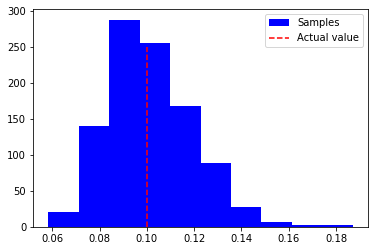

In [5]:
samples_flat = np.array([item for sublist in samples for item in sublist])

# print(samples_flat[:])
plt.hist(samples_flat[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=250, label="Actual value", color="red")
plt.legend()
plt.show()

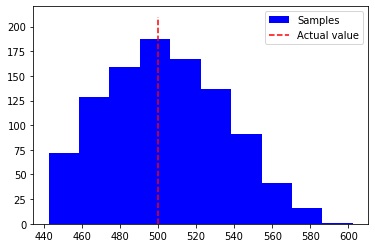

In [6]:
plt.hist(samples_flat[:,1], color="blue", label="Samples")
plt.vlines(x=500, linestyles='dashed', ymin=0, ymax=210, label="Actual value", color="red")
plt.legend()
plt.show()

# PMC

In [4]:
np.random.seed(3)

abc = pints.ABCController(error_measure, log_prior, method=pints.ABCPMC)

# set the threshold
abc.sampler().set_threshold(40)

# set target number of samples
# try this
abc.set_n_samples(1000)

# setting the number of generations
abc.sampler().set_n_generations(10)

# setting the threshold ratio
abc.sampler().set_t_ratio(0.99)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using PMC ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     81936  0.0122168522    32:48.9
Halting: target number of samples (1001) reached.
Done


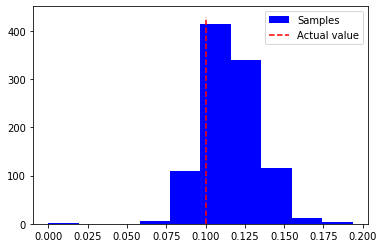

In [8]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=430, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

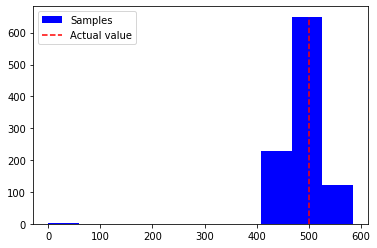

In [7]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=500, linestyles='dashed', ymin=0, ymax=650, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

# ABC SMC

In [7]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([50, 40, 30]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(1000)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in sequential mode.
Trying t=1, threshold=40
Trying t=2, threshold=30
Iter. Eval. Acceptance rate Time m:s
1     6164   0.000162232317   0:29.1
2     6174   0.000323939099   0:29.2
3     6178   0.000485594043   0:29.2
20    6408   0.00312109863    0:30.4
40    6541   0.00611527289    0:31.2
60    6691   0.00896726947    0:31.9
80    6906   0.0115841297     0:33.0
100   7072   0.0141402715     0:33.8
120   7260   0.0165289256     0:34.6
140   7542   0.0185627155     0:36.1
160   7776   0.0205761317     0:37.2
180   8031   0.022413149      0:38.6
200   8277   0.0241633442     0:39.9
220   8540   0.0257611241     0:41.2
240   8783   0.0273255152     0:42.3
260   9027   0.0288024814     0:43.5
280   9211   0.0303984367     0:44.5
300   9425   0.0318302387     0:45.6
320   9649   0.0331640585     0:46.8
340   9845   0.0345352971     0:47.7
360   10082  0.035707201      0:49.0
380   10284  0.0369506029     0:50.1
400   10465  0.0382226469     0:51.0
420   10707  0.03922

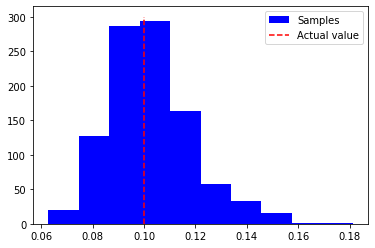

In [9]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=300, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

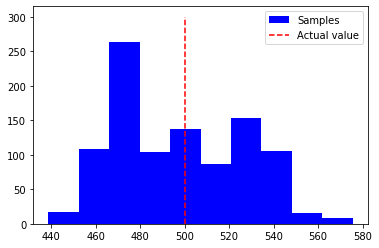

In [10]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=500, linestyles='dashed', ymin=0, ymax=300, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

# Adaptive PMC ABC

In [14]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(500)

# set p_acc_min
abc.sampler().set_p_acc_min(0.05)

# set target number of samples
abc.set_n_samples(1000)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in sequential mode.
w_mean=[1.35500978e-01 5.23159352e+02]
epsilon=153.16102637420525
w_mean=[1.14577096e-01 5.33571684e+02]
epsilon=114.56046438453365
w_mean=[1.07957675e-01 5.24483598e+02]
epsilon=88.6190348251059
w_mean=[1.04751620e-01 5.16271987e+02]
epsilon=74.13658566007295
w_mean=[1.05155635e-01 5.08672666e+02]
epsilon=65.84527317886987
w_mean=[1.04069084e-01 5.04876683e+02]
epsilon=58.06519324575323
w_mean=[1.03288473e-01 4.98263706e+02]
epsilon=52.01762521812519
w_mean=[1.02809585e-01 4.99279085e+02]
epsilon=47.16990566028302
w_mean=[1.01424125e-01 5.00645583e+02]
epsilon=44.32681656364087
w_mean=[1.01680978e-01 5.00154944e+02]
epsilon=41.07432287938536
w_mean=[1.00678809e-01 5.01782183e+02]
epsilon=38.99187949646268
w_mean=[1.00080155e-01 5.04052641e+02]
epsilon=35.7980446393375
w_mean=[1.00761148e-01 5.03910009e+02]
epsilon=32.77244777756665
w_mean=[1.02318824e-01 5.04736180e+02]
epsilon=30.90631003533097
w_mean=[1.03173173e-01 5.027

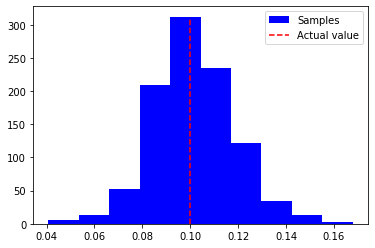

In [16]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=310, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

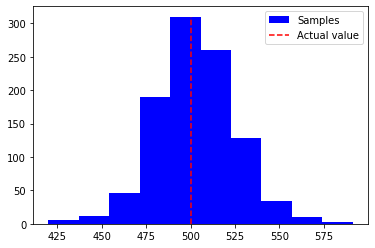

In [17]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=500, linestyles='dashed', ymin=0, ymax=310, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()